

<h1> Pandas </h1>

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

<h2> Series </h2>


In [1]:
import pandas as pd

In [2]:
ser1 = pd.Series ([-2,3,4,3,-1])
print(type(ser1))

print(ser1)

<class 'pandas.core.series.Series'>
0   -2
1    3
2    4
3    3
4   -1
dtype: int64


<h3> Indeces to a Series </h3>

In [3]:
#passing a list to a Series
I = [x *2 for x      in range (0,5)]
ser2=pd.Series([-2,3,4,3,-1],index = I)
print(ser2)
#another index list
people=['albert','betty','charlotte','dana','elmer']
serP=pd.Series([-2,3,4,3,-1],people)
print(serP)


0   -2
2    3
4    4
6    3
8   -1
dtype: int64
albert      -2
betty        3
charlotte    4
dana         3
elmer       -1
dtype: int64


In [7]:
serP.index


Index(['albert', 'betty', 'charlotte', 'dana', 'elmer'], dtype='object')

In [6]:

#Series from a  Dictionary
elem={'H':'Hydrogen', 'He':'Helium', 'Li':'Lithium', 'Be':'Beryllium','B':'Boron',
     'C':'Carbon','N':'Nitrogen'}
print("Elem Type: {}.".format(type(elem)))

serElem=pd.Series(elem)
print(serElem)
print("SerElem Type: {}.".format(type(serElem)))
print("indices (with .keys() function :  {:}".format(elem.keys()))
serElem.index


Elem Type: <class 'dict'>.
H      Hydrogen
He       Helium
Li      Lithium
Be    Beryllium
B         Boron
C        Carbon
N      Nitrogen
dtype: object
SerElem Type: <class 'pandas.core.series.Series'>.
indices (with .keys() function :  dict_keys(['H', 'He', 'Li', 'Be', 'B', 'C', 'N'])


Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N'], dtype='object')

<p> <span style ="color:purple"> Convert the following dict in series "serElem2" and check </span>

In [6]:
#testElem2=pd.Series(elem2)

#assert(serElem2.equals(pd.Series(elem2))),"not equal"

In [14]:

serElem2= pd.Series(elem)
print(type(serElem2))
print(serElem2)
print(serElem2.index      ())

<class 'pandas.core.series.Series'>
H      Hydrogen
He       Helium
Li      Lithium
Be    Beryllium
B         Boron
C        Carbon
N      Nitrogen
dtype: object
Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N'], dtype='object')


<h3> Vector-like operations </h3>

In [7]:
ladies = [1,2,3]
serP[ladies]

betty        3
charlotte    4
dana         3
dtype: int64

<p> <span style ="color:purple"> Define a list 'males' and cast it on the series serP , indices : 0 and 4</span>

albert   -2
elmer    -1
dtype: int64

In [9]:
males = [0,4]
serP[males]

albert   -2
elmer    -1
dtype: int64

<h4> Using the apply(function) on Series </h4>

In [13]:
serP.apply(abs)


albert       2
betty        3
charlotte    4
dana         3
elmer        1
dtype: int64

In [9]:
serP.apply(lambda x: x**2)

albert        4
betty         9
charlotte    16
dana          9
elmer         1
dtype: int64

<p> <span style ="color:purple"> define serPdiv2 dividing by 2 serP values with .apply method</span>

albert       (8.659560562354934e-17+1.4142135623730951j)
betty                            (1.7320508075688772+0j)
charlotte                                         (2+0j)
dana                             (1.7320508075688772+0j)
elmer                         (6.123233995736766e-17+1j)
dtype: complex128

In [10]:
serPdiv2= serP.apply(lambda x: x/2)
serPdiv2

albert      -1.0
betty        1.5
charlotte    2.0
dana         1.5
elmer       -0.5
dtype: float64

<h4> .value_counts: an immediate table</h4>

<p> `value_counts` applies to Series and not to Pandas DataFrame 

`SeriesName.value_counts(normalize and args)`

In [16]:


countries= pd.Series(['Italy', 'Italy', 'Germany'])
print(countries.value_counts(normalize=False))
print(countries.value_counts(normalize=False)*len(countries))
print()

Italy      2
Germany    1
dtype: int64
Italy      6
Germany    3
dtype: int64



In [22]:
letters=['a','a','a','a','a','a','c','c','c','b','c','c','b','a','a','a']


In [25]:
#disgression usingo on lists
from collections import Counter
Counter(letters)


AttributeError: 'list' object has no attribute 'value_counts'

<p> <span style ="color:purple"> define lettersSer and make a frequency table</span>

a    9
c    5
b    2
dtype: int64

In [4]:
(letters.sort())
print(letters)
lettersSer=pd.Series(letters)
print(lettersSer.value_counts(normalize=False, sort=False))

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'c', 'c']
a    9
b    2
c    5
dtype: int64


<h4> Sorting </h4>

In [2]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


column.`sort_values()`

In [30]:

print(movies.title.sort_values()[:3])
print("returns a pandas series\n it does not alter underlying data")

542    (500) Days of Summer
5              12 Angry Men
201        12 Years a Slave
Name: title, dtype: object
returns a pandas series
 it does not alter underlying data


In [8]:
print(movies.title.sort_values(ascending=False)[:3])

864         [Rec]
526          Zulu
615    Zombieland
Name: title, dtype: object


`df.sort_values(columnName)`

In [31]:
print("the entire df")
movies.sort_values('duration', ascending=False)[:3]

the entire df


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."


In [23]:
#sort by two columns
print("content rating and then duration")
movies.sort_values(['content_rating', 'duration'])[:3]

content rating and then duration


,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."


<p> <span style ="color:purple">
    sort data frame by duration descending and star_rating descending
    </span>

In [1]:
movies.sort_values(['duration', 'star_rating'], ascending=[False, False])[:4]

NameError: name 'movies' is not defined

In [9]:
#movies.sort_values(['star_rating', 'title'], ascending =[False, True] )[10:19]

<h2>Dataframe from other structures </h2>

In [12]:
import pandas as pd

<h3>from Series </h3>

In [21]:
ser1=pd.Series([str('Van Beethoven'), 'Germany',1770,1827],index=['name','nation','born', 'dec'])
ser2=pd.Series(['Francois Couperin', 'France',1685,1733],index=['name','nation','born', 'dec'])
ser3=pd.Series(['J.S. Bach', 'Germany', 1685, 1750],index=['name','nation','born', 'dec'] )
ser4=pd.Series(['Joseph Haydn', 'Austria', 1732, 1809],index=['name','nation','born', 'dec'] )

In [22]:
#dataframe = [ser1,ser2..sern]
serDF = pd.DataFrame([ser1,ser2,ser3,ser4])
serDF

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
1,Francois Couperin,France,1685,1733
2,J.S. Bach,Germany,1685,1750
3,Joseph Haydn,Austria,1732,1809


In [20]:
serDF['name'].name =='name'

True

In [7]:
def df2Dic(df):
    '''converts dataframe in dictionary , assumes df is a pandas DataFrame'''
    dfDic={}
    for col in df.columns:
        dfDic[df[col].name]=df[col]
    return dfDic
D= df2Dic(serDF)
D

{'name': 0        Van Beethoven
 1    Francois Couperin
 2            J.S. Bach
 3         Joseph Haydn
 Name: name, dtype: object, 'nation': 0    Germany
 1     France
 2    Germany
 3    Austria
 Name: nation, dtype: object, 'born': 0    1770
 1    1685
 2    1685
 3    1732
 Name: born, dtype: int64, 'dec': 0    1827
 1    1733
 2    1750
 3    1809
 Name: dec, dtype: int64}

<h3> from Dictionary </h3>

<p><strong>key</strong> is the column/field name  , <strong>value</strong> is a list of  values in the field  </p> <p> fieldName : field1, field2 ....fieldn </p>

In [12]:
D={'name':['Van Beethoven','Francois Couperin'], 'nation':['Germany','France'], 'born':[1770,1685]}
#D

In [13]:
dicDF= pd.DataFrame(D)
dicDF

,name,nation,born
0,Van Beethoven,Germany,1770
1,Francois Couperin,France,1685


In [11]:
#show columns
serDF.columns

Index(['name', 'nation', 'born', 'dec'], dtype='object')

<p> each <b> column </b> is a <b> named Series </b>

In [14]:
type(serDF['name'])

pandas.core.series.Series

In [15]:
print(serDF.index)
print(serDF['name'].index)

RangeIndex(start=0, stop=4, step=1)
RangeIndex(start=0, stop=4, step=1)


<h3> Slice and accessing </h3>

In [16]:
serDF[1:3]


,name,nation,born,dec
1,Francois Couperin,France,1685,1733
2,J.S. Bach,Germany,1685,1750


In [28]:
#access by index
serDF.iloc[1:3]

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
2,J.S Bach,Germany,1685,1750


In [20]:
#subsets with loc
serDF.loc[[0,3]]

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
1,Francois Couperin,France,1685,1733
2,J.S. Bach,Germany,1685,1750
3,Joseph Haydn,Austria,1732,1809


In [30]:
#filtering Rbase-like
serDF[serDF['nation']=='Germany']

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
2,J.S Bach,Germany,1685,1750


filtering with strings containing expresion with `str.contains()`

In [25]:
#filtering Rbase-like
serDF[serDF['name'].str.contains('h')]

AttributeError: 'Series' object has no attribute 'contains'

In [26]:
#filtering multiple conditions

In [16]:
serDF[ (serDF.born > 1600) & ( serDF.born < 1700 )] #      or
serDF[ (serDF['born'] > 1600) & ( serDF['born'] < 1700 )]

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
2,J.S Bach,Germany,1685,1750


<p> <span style ="color:purple"> select Austrian and French in df 'AF' </span>

In [23]:
serDF[ (serDF["nation"]=="France"     )|(serDF["nation"] =='Austria'    )]

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
3,Joseph Haydn,Austria,1732,1809


In [17]:
AF= serDF[ (serDF.nation=='France') | (serDF.nation=='Austria')]  
# or
AF = serDF[ ( serDF['nation']=='Austria' ) | (serDF['nation']=='France')]
AF

,name,nation,born,dec
1,Francois Couperin,France,1685,1733
3,Joseph Haydn,Austria,1732,1809


<h4> More filtering rows </h4>

In [18]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.shape

(979, 6)

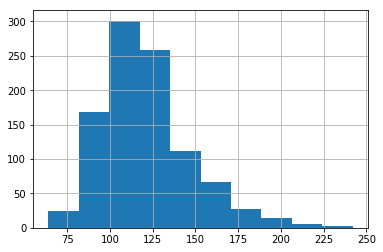

In [20]:
from matplotlib import pyplot as plt
movies.duration.hist()

In [25]:
print("filter in movies  of at list 200 min")
is_long = movies.duration >= 200
print(is_long[:2])
movies200 = movies[is_long]
#or
movies[movies.duration>=200]
movies200[:3]

filter in movies  of at list 200 min
0    False
1    False
Name: duration, dtype: bool


,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."


<p> <span style ="color:purple">create df moviesBest  with star_rating >=9</span>

,title,star_rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Godfather: Part II,9.1
3,The Dark Knight,9.0


In [29]:
best = movies.star_rating>= 9
moviesBest = movies[best]
moviesBest

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [30]:
print("get just one or partial column  with the condition")

get just one or partial column  with the condition


In [29]:
genre200 = movies[is_long][['title','genre']]
genre200.head(3)

,title,genre
2,The Godfather: Part II,Crime
7,The Lord of the Rings: The Return of the King,Adventure
17,Seven Samurai,Drama


<h4>.loc </h4>
selects rows and columns by label
<p>
`.loc` is followed by braquets `[]'

In [37]:
#with loc , better  
movies.loc[movies.duration >= 200, ['title','genre']].head(2)

NameError: name 'movies' is not defined

<p> <span style ="color:purple"> select rating, title and genre of movies that star_rating >=9 , using .loc</span>

,star_rating,title,genre
0,9.3,The Shawshank Redemption,Crime
1,9.2,The Godfather,Crime
2,9.1,The Godfather: Part II,Crime
3,9.0,The Dark Knight,Action


In [38]:
movies.loc[ best , ['star_rating','title', 'genre'] ]

,star_rating,title,genre
0,9.3,The Shawshank Redemption,Crime
1,9.2,The Godfather,Crime
2,9.1,The Godfather: Part II,Crime
3,9.0,The Dark Knight,Action


In [47]:
movies.loc[movies.star_rating == movies.star_rating.max(), ['star_rating', 'title'] ]
#df[df.Points == df.Points.max()]) 

,star_rating,title
0,9.3,The Shawshank Redemption


9.3

<p><span style="color:purple"> using `isin()` select only Drama, Action and Comedy  </span>

{'Crime', 'Drama'}

In [40]:
filtered = movies[movies.genre.isin(['Crime', 'Drama', 'Comedy'])]
filtered[-3:]

,star_rating,title,content_rating,genre,duration,actors_list
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [54]:
wscast= movies.loc[movies.title=='Wall Street', ['actors_list']]
wscastst= str(wscast)
wscastst[-20:]

"Douglas', u'Tamar..."

In [61]:
mx=movies.star_rating = movies[movies.genre=='Drama'].star_rating.max()
mx

8.9

In [73]:
bestDrama = movies.loc[movies.star_rating == movies[movies.genre=='Drama'].star_rating.max() , ['star_rating', 'title', 'genre']]
bestDrama = bestDrama[bestDrama.genre=='Drama']
bestDrama

,star_rating,title,genre
5,8.9,12 Angry Men,Drama
9,8.9,Fight Club,Drama
13,8.9,Forrest Gump,Drama
16,8.9,One Flew Over the Cuckoo's Nest,Drama
17,8.9,Seven Samurai,Drama
22,8.9,It's a Wonderful Life,Drama
24,8.9,Se7en,Drama
27,8.9,The Silence of the Lambs,Drama
32,8.9,Casablanca,Drama
33,8.9,Whiplash,Drama


`.iloc[row_n, column_n]`

<h4> Lookup one value , other column that the one queried  with .loc{DF{col] </h4>

In [48]:
countryCouperin=serDF[serDF['name']=='Francois Couperin']#iloc[0]['nation']
countryCouperin

,name,nation,born,dec
1,Francois Couperin,France,1685,1733


In [51]:
nameGer=serDF[serDF['nation']=='Germany']#iloc[1]['name']
nameGer

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
2,J.S. Bach,Germany,1685,1750


In [52]:
nameGer=serDF[serDF['nation']=='Germany'].iloc[1]['name']
nameGer

'J.S. Bach'

<p> <span style ="color:purple"> get HaydnBorn with the same method </span>

1750

In [9]:
HaydnBorn = serDF[serDF['name']=='Joseph Haydn'].iloc[0]['born']
# or
HaydnBorn = serDF[ serDF.name=='Joseph Haydn'].iloc[0].born
HaydnBorn

1732


<h4> the axis() parameter </h4>

In [7]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe


In [8]:
#droping a column
drinks.drop('continent', axis = 1).head(2)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9


In [48]:
#drop a row 
drinks.drop(1, axis=0).head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
2,Algeria,25,0,14,0.7,Africa


In [9]:
#drop a row
import pandas as pd
import numpy as np
obj = pd.Series( np.arange(5.)  , index=['a','b','c','d','e'] )
print(obj)
print("\nnew_obj")
new_obj= obj.drop(['d','c'])
print(new_obj)

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

new_obj
a    0.0
b    1.0
e    4.0
dtype: float64


In [59]:
drinks.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [60]:
print("using axis= 1")
import numpy as np
row1=(list(drinks[drinks.country=='Albania'].loc[1]))
row1= row1[1:-1]
print(row1)
print("numpy result  for row 1: {:}".format(np.mean(row1) ))
drinks.mean(axis=1).head(2)

using axis= 1
[89, 132, 54, 4.9]
numpy result  for row 1: 69.975


0     0.000
1    69.975
dtype: float64

axis 0 is the same as  `axis='index'`
axis 1 is the same as  `axis ='columns'

In [78]:
drinks.mean(axis='index')[:2] # axis = 0  for all the rows , indices

beer_servings      106.160622
spirit_servings     80.994819
dtype: float64

In [80]:
drinks.mean(axis='columns')[:2] #axis= 1  for all the columns

0     0.000
1    69.975
dtype: float64

string functions 
https://pandas.pydata.org/pandas-docs/stable/text.html

In [10]:
#!= negative operator
serDF[ serDF.born != 1685]

,name,nation,born,dec
0,Van Beethoven,Germany,1770,1827
3,Joseph Haydn,Austria,1732,1809


In [17]:
serDF[ serDF.born != 1685].iloc[:]['born']

0    1770
3    1732
Name: born, dtype: int64

<h3>Dropping columns </h3>

In [26]:
noNation = serDF.drop('nation',1)
noNation.head(2)


,name,born,dec
0,Van Beethoven,1770,1827
1,Francois Couperin,1685,1733


<h3>Group by </h3>

In [11]:
import pandas as pd
#building dataframe from series (and cols)
cols=['code',   'name', 'category' , 'price' , 'quantity']
p1=pd.Series(['001', 'pear', 'fruit', 1.5, 200], cols)
p2=pd.Series(['002', 'apple', 'fruit', 1.2, 300], cols)
p3=pd.Series(['003', 'orange', 'fruit', 1, 250], cols)
p4=pd.Series(['004', 'potato', 'veg', 0.7, 550], cols)
p5=pd.Series(['005', 'cucumber', 'veg', 0.8, 800], cols)
p6=pd.Series(['006', 'eggplant', 'veg', 1.3, 120], cols)
p7=pd.Series(['007', 'chickpeas', 'legumes', 2.3, 120], cols)
p8=pd.Series(['008', 'red lentils', 'legumes', 2.1, 750], cols)
# DataFrame from a [list] of series as erlier
shop = pd.DataFrame([p1,p2,p3,p4,p5,p6,p7,p8])
#shop
shop

,code,name,category,price,quantity
0,001,pear,fruit,1.5,200
1,002,apple,fruit,1.2,300
2,003,orange,fruit,1.0,250
3,004,potato,veg,0.7,550
4,005,cucumber,veg,0.8,800
5,006,eggplant,veg,1.3,120
6,007,chickpeas,legumes,2.3,120
7,008,red lentils,legumes,2.1,750


In [13]:
shopCat=shop[['category' , 'name']].groupby('category').count()
print("count")
print(shopCat)
shopCatQ=shop[['category','quantity']].groupby('category').aggregate(['sum'])
shopCatQ                                                                      


count
          name
category      
fruit        3
legumes      2
veg          3


,quantity
,sum
category,
fruit,750
legumes,870
veg,1470


optional for a plot.bar()

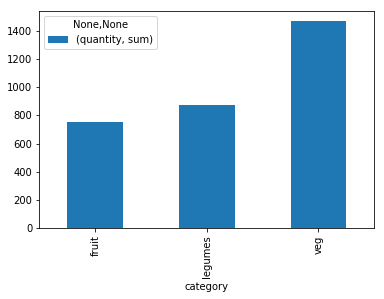

In [14]:
%matplotlib inline
shopCatQ.plot.bar()
#shopCatQ.plot.barh()

<p> <span style ="color:purple">group by and get the mean price per category in a shopMean df</span>

In [64]:
shopMean = shop[['category', 'price']].groupby('category').aggregate(['mean'])

In [37]:
shopMean

,price
,mean
category,
fruit,1.233333
legumes,2.200000
veg,0.933333


<h5> Iterating Over Groups </h5>

In [26]:
for name, category in shop.groupby('category'):
    print(name)
    print(category)

fruit
  code    name category  price  quantity
0  001    pear    fruit    1.5       200
1  002   apple    fruit    1.2       300
2  003  orange    fruit    1.0       250
legumes
  code         name category  price  quantity
6  007    chickpeas  legumes    2.3       120
7  008  red lentils  legumes    2.1       750
veg
  code      name category  price  quantity
3  004    potato      veg    0.7       550
4  005  cucumber      veg    0.8       800
5  006  eggplant      veg    1.3       120


<h3> morre grouping with the drinks dataset </h3>

In [4]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [34]:
drinks.beer_servings.mean()

106.16062176165804

<p> mean by category  with `groupby` </p>

In [41]:
drinks.groupby('continent').beer_servings.mean().round()

continent
Africa            61.0
Asia              37.0
Europe           194.0
North America    145.0
Oceania           90.0
South America    175.0
Name: beer_servings, dtype: float64

<h4> multiple aggregation functions with  `.agg` </h4>

In [44]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean', 'std'])

,count,min,max,mean,std
continent,,,,,
Africa,53,0,376,61.471698,80.557816
Asia,44,0,247,37.045455,49.469725
Europe,45,0,361,193.777778,99.631569
North America,23,1,285,145.434783,79.621163
Oceania,16,0,306,89.687500,96.641412
South America,12,93,333,175.083333,65.242845


<p> the aggregation for all the columns </p>

In [45]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


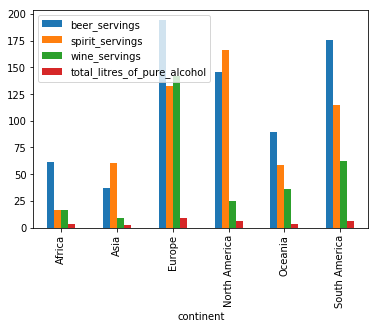

In [8]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')

In [29]:
print("the cars dataframe")
path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
#cars = pd.read_csv(path)
#cars.head()

the cars dataframe


<p> <span style ="color:purple">group the `drive-wheels` variable viewing its values with `.unique()`</span>

In [30]:
#cars['drive-wheels'].unique()

<p> <span style ="color:purple">given group_one, compute the mean price for drive-wheels</span> <br>
    hint: use `as_index=False` 

In [38]:
cars_group_one=cars[['drive-wheels','body-style','price']]
cars_group_one=cars_group_one.groupby(['drive-wheels'], as_index=False).mean()
cars_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [39]:
cars_group_one=cars_group_one.groupby(['drive-wheels'],as_index= False).mean()
cars_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p> grouping multiple variables </p>

In [40]:
# grouping results
cars_gptest=cars[['drive-wheels','body-style','price']]
grouped_test1=cars_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [43]:
import numpy as np
df= pd.DataFrame({'key1':['a','a','b','b','a'],'key2': ['one', 'two', 'one', 'two', 'one'],    
                  'data1':np.random.randn(5),'data2': np.random.randn(5)  }  )
df

,key1,key2,data1,data2
0,a,one,-1.427223,-0.325920
1,a,two,-2.035703,1.827099
2,b,one,0.072990,0.266080
3,b,two,0.334984,-0.234405
4,a,one,-0.337583,-0.701262


In [40]:
df.groupby('key1')['data1'].mean()


key1
a   -1.236804
b    0.570578
Name: data1, dtype: float64

<p> <span style ="color:purple"> show the max of data1 in key1 with grouping </span>

In [44]:
grouped = df.groupby('key1')['data1'].max()
grouped

key1
a   -0.337583
b    0.334984
Name: data1, dtype: float64

<h5> using pivot </h5>

`grouped_pivot = grouped_table.pivot( index = 'indexName' , columns= 'columnLabel')`

In [44]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [80]:
#this will fill the NaN with 0
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
#grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p> <span style ="color:purple">groupby body-style and avg price     pivot </span> <br>
    hint: use `as_index=False` 

<ol>
    <li> opt: arange the sub-dataframe </li>
    <li> groupby and mean or other aggregate  </li>
    
</ol>

In [85]:
cars_group_one = cars[['drive-wheels' , 'body-style'  , 'price']]


,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [83]:
#1
cars_group_one=cars[['drive-wheels','body-style','price']]
#2
cars_group_one = cars_group_one.groupby(['body-style'],as_index=False).mean()
cars_group_one

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<p> <span style ="color:purple">with a multiple var group build a pivot</span> <br>
    hint: use `as_index=False` 

<ol>
    <li> opt: arange the sub-dataframe </li>
    <li> form a grouped multiple table  </li>
    <li> pivot </li>
    
</ol>

In [53]:
#1
cars_group_one=cars[['drive-wheels','body-style','price']]
#2
cars_grouped= cars_group_one.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
#3
pivoted= cars_grouped.pivot(index='body-style', columns='drive-wheels').round()
pivoted

price                  
drive-wheels      4wd      fwd      rwd
body-style                             
convertible       NaN  11595.0  23950.0
hardtop           NaN   8249.0  24203.0
hatchback      7603.0   8396.0  14338.0
sedan         12647.0   9812.0  21712.0
wagon          9096.0   9997.0  16994.0

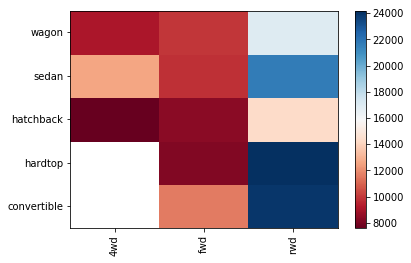

In [43]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots()
im=ax.pcolor(pivoted, cmap='RdBu')
#label names
row_labels=pivoted.columns.levels[1]
col_labels=pivoted.index
#move ticks and labels to the center
ax.set_xticks(np.arange(pivoted.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(pivoted.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3>Aggregate, filter, transform, apply</h3>

In [9]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

In [10]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [12]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

<p> <span style ="color:purple">group by key and aggregate the sum and count </span>

data1       data2      
      sum count   sum count
key                        
A       3     2     8     2
B       5     2     7     2
C       7     2    12     2

In [41]:
df.groupby('key').aggregate(['count', 'sum'])

data1     data2    
    count sum count sum
key                    
A       2   3     2   8
B       2   5     2   7
C       2   7     2  12

In [14]:
#transformation
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [15]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
display('df', "df.groupby('key').apply(norm_by_data2)")
#df.groupby('key').apply(norm_by_data2)

'df'

"df.groupby('key').apply(norm_by_data2)"

In [16]:
def price_stock(row):
    return row['price']*row['quantity'    ]
shop['stock']= shop.apply(price_stock, axis=1)
shop

NameError: name 'shop' is not defined

In [52]:
def top (df, n=2, column='price'):
    return df.sort_index(by=column)[-n:]
print(top(shop))
#applying apply with groups
shop.groupby('category').apply(top)

  code         name category  price  quantity
7  008  red lentils  legumes    2.1       750
6  007    chickpeas  legumes    2.3       120


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


code         name category  price  quantity
category                                              
fruit    1  002        apple    fruit    1.2       300
         0  001         pear    fruit    1.5       200
legumes  7  008  red lentils  legumes    2.1       750
         6  007    chickpeas  legumes    2.3       120
veg      4  005     cucumber      veg    0.8       800
         5  006     eggplant      veg    1.3       120

In [55]:
df =pd.DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],'data': np.random.randn(8), 'weights': np.random.rand(8)})

In [73]:
grouped=df.groupby('category')
grouped
#defined a weighted average function
get_wavg= lambda g: np.average(g['data'], weights=g['weights'])
#  trying it
print(np.average([3,3,4],weights=[10,10,90]))
# print(get_wavg=[3,3,4],weights=[100,12,3])
#.apply
grouped.apply(get_wavg)

3.8181818181818183


category
a   -1.195964
b   -0.166198
dtype: float64

<h4>Edit headers </h4>

In [17]:
newHeaders= ['code', 'prod', 'cat', 'value', 'qty', 'v*q']
shop.columns = newHeaders
shop[:2]

,code,prod,cat,value,qty,v*q
0,001,pear,fruit,1.5,200,300.0
1,002,apple,fruit,1.2,300,360.0


<h3> Save a Dataframe </h3>

`dfname.to_csv("filename.csv")`

In [18]:
shop.to_csv("shop.csv")

In [13]:
serDF

NameError: name 'serDF' is not defined

<p> <span style ="color:purple">create a new column - years </span>

In [46]:
serDF['years']  =  serDF['dec']  - serDF['born'] 

<h3> Working with multiple DataFrames </h3>

In [17]:
from io import StringIO

#import hashlib

In [25]:
with StringIO("""composer, work, year
Van Beethoven,Opus 61 Violin Concerto in D major ,1806
Van Beethoven, Opus 50 Romance for Violin and Orchestra No. 2 in F major, 1798
J.S. Bach, Partita No. 6 in E minor BWV 830, 1731""") as fp:
    works = pd.read_csv(fp)
works
#works['composer'] =works['composer'].astype(str)
#serDF['name'] =serDF['name'].astype(str)


,composer,work,year
0,Van Beethoven,Opus 61 Violin Concerto in D major,1806
1,Van Beethoven,Opus 50 Romance for Violin and Orchestra No. ...,1798
2,J.S. Bach,Partita No. 6 in E minor BWV 830,1731


<h4> merge join </h4>

In [19]:
A.columns

NameError: name 'A' is not defined

In [26]:
#inner Join"
A=serDF.copy()
B=works.copy()
print("\n inner join")

innerDF = serDF.merge(works, left_on='name', right_on='composer')
innerDF


 inner join


,name,nation,born,dec,composer,work,year
0,Van Beethoven,Germany,1770,1827,Van Beethoven,Opus 61 Violin Concerto in D major,1806
1,Van Beethoven,Germany,1770,1827,Van Beethoven,Opus 50 Romance for Violin and Orchestra No. ...,1798
2,J.S. Bach,Germany,1685,1750,J.S. Bach,Partita No. 6 in E minor BWV 830,1731


In [27]:
print("\n left join")
L=A.merge(B,left_on='name', right_on='composer', how="left")
L


 left join


,name,nation,born,dec,composer,work,year
0,Van Beethoven,Germany,1770,1827,Van Beethoven,Opus 61 Violin Concerto in D major,1806.0
1,Van Beethoven,Germany,1770,1827,Van Beethoven,Opus 50 Romance for Violin and Orchestra No. ...,1798.0
2,Francois Couperin,France,1685,1733,NaN,NaN,NaN
3,J.S. Bach,Germany,1685,1750,J.S. Bach,Partita No. 6 in E minor BWV 830,1731.0
4,Joseph Haydn,Austria,1732,1809,NaN,NaN,NaN


<h4> merge </h4>

In [52]:
A_csv = """country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766"""
with StringIO(A_csv) as fp:
    A = pd.read_csv(fp)
B_csv = """country,year,population
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583"""
with StringIO(B_csv) as fp:
    B = pd.read_csv(fp)

=== A ===


,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766



=== B ===


,country,year,population
0,Afghanistan,1999,19987071
1,Brazil,1999,172006362
2,China,1999,1272915272
3,Afghanistan,2000,20595360
4,Brazil,2000,174504898
5,China,2000,1280428583


In [62]:
print("=== A ===")
display(A)
print("\n=== B ===")
display(B)

=== A ===


,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766



=== B ===


,country,year,population
0,Afghanistan,1999,19987071
1,Brazil,1999,172006362
2,China,1999,1272915272
3,Afghanistan,2000,20595360
4,Brazil,2000,174504898
5,China,2000,1280428583


<p> <span style ="color:purple">merge the A and B in a C table on country and year to get population and cases in each row, sort by 'country' column and last year first
    <br> using:</span>

`Tbl3 = Tbl1.merge(Tbl2, on = ['commonField1', 'commonField2','commonFieldN'])` <br>
`df.sort_values(by=['col'])      /(['col1',col2]  ascending=[True,False])` for asc, desc

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Brazil,1999,37737,172006362
2,China,1999,212258,1272915272
3,Afghanistan,2000,2666,20595360
4,Brazil,2000,80488,174504898
5,China,2000,213766,1280428583


In [75]:
C = A.merge(B, on = ['country', 'year']).sort_values(by=['country','year'] ,ascending=[True,False])                                                     
display(C)

,country,year,cases,population
3,Afghanistan,2000,2666,20595360
0,Afghanistan,1999,745,19987071
4,Brazil,2000,80488,174504898
1,Brazil,1999,37737,172006362
5,China,2000,213766,1280428583
2,China,1999,212258,1272915272


<h4> pd.concat </h4>

In [ ]:
cols =['name','nation','born', 'dec']

In [ ]:
df2= pd.DataFrame([pd.Series   (['W. A. Mozart','Austria',1756,1791],index=cols)])
df2

In [ ]:
dfTotal=pd.concat([A,df2])
dfTotal


https://pandas.pydata.org/pandas-docs/stable/merging.html

<h3>Selections, Data manipulations, Quering rows and columns </h3>

<p> <span style ="color:purple">load  the USDA.csv database as df</span>

In [28]:
df = pd.read_csv("USDA.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 16 columns):
ID              7058 non-null int64
Description     7058 non-null object
Calories        7057 non-null float64
Protein         7057 non-null float64
TotalFat        7057 non-null float64
Carbohydrate    7057 non-null float64
Sodium          6974 non-null float64
SaturatedFat    6757 non-null float64
Cholesterol     6770 non-null float64
Sugar           5148 non-null float64
Calcium         6922 non-null float64
Iron            6935 non-null float64
Potassium       6649 non-null float64
VitaminC        6726 non-null float64
VitaminE        4338 non-null float64
VitaminD        4224 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 882.3+ KB


In [30]:
sodium=(df['Sodium'])

which is the name(Description) of the maximum Sodium?

In [43]:
df.loc[df['Sodium']== max(df['Sodium']), 'Description'].iloc[0]

'SALT,TABLE'

In [41]:
df.loc[df['Sodium']== max(df['Sodium']), ['Description']]

,Description
264,"SALT,TABLE"


`df.loc[df['selectedField'] == max[df'selectedField']), 'targetField'].iloc[0]`

<p> <span style ="color:purple">get the Description and ID of the max Cholesterol food</span>


,ID,Description,Cholesterol
3533,13320,"BEEF,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,SIMMRD",3100.0
4933,17189,"VEAL,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,BRSD",3100.0


In [47]:
df.loc[ df['Cholesterol']==max(df['Cholesterol']),['ID','Description']].iloc[0]

ID                                                   13320
Description    BEEF,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,SIMMRD
Name: 3533, dtype: object

<p> <span style ="color:purple">get the Description of the max Potassium food</span>

In [ ]:
df.loc[ df['Potassium']==max(df['Potassium'] ) ,'Description' ].iloc[0]

<p> <span style ="color:purple">get get all the descriptions  containing "BEANS" in the string</span>

`df.loc[df['selectedField'].str.contains('selectedStr'), 'targetField']`

In [ ]:
df.loc[df['Description'].str.contains('BEANS'), 'Description']

<p> <span style ="color:purple">get get the mean and std of foods  containing "BEANS" in the string</span>

In [ ]:
meanB= df.loc[df['Description'].str.contains('BEANS'), 'Calories'].mean()
stdB= df.loc[df['Description'].str.contains('BEANS'), 'Calories'].std()
print("mean: {:.1F}, stdev: {:.1F}".format(meanB,stdB))

<p> <span style ="color:purple">get the calories in beanCals and draw histogram</span>

In [ ]:
import matplotlib.pyplot as plt



In [ ]:
beanCals=df.loc[ df['Description'].str.contains("BEANS") , 'Calories'  ]

In [ ]:
plt.hist(beanCals, bins=20)

<p> <span style ="color:purple">subset  hiSodium as df which Sodium > 10000</span>

In [ ]:
hiSodium = df.loc[df['Sodium']>10000]
#hiSodium.describe()

<h4> nlargest() </h4>

 `nlargest( k , 'selField' )`

In [50]:
df.nlargest(3,'Cholesterol')

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
3533,13320,"BEEF,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,SIMMRD",151.0,11.67,10.53,1.48,108.0,2.394,3100.0,0.0,9.0,2.30,244.0,10.5,1.67,0.0
4933,17189,"VEAL,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,BRSD",136.0,11.48,9.63,0.00,156.0,2.180,3100.0,NaN,16.0,1.67,214.0,13.0,NaN,NaN
3531,13318,"BEEF,VAR MEATS&BY-PRODUCTS,BRAIN,RAW",143.0,10.86,10.30,1.05,126.0,2.300,3010.0,0.0,43.0,2.55,274.0,10.7,0.99,NaN


<p> <span style ="color:purple">subset  threeProt as the Descriptions of the 3 richest proteins foods > 10000</span>

`nlargest( k , 'selField' )['targetField']`


In [53]:
df.nlargest(3,'Protein')[['Description', 'Protein']]

,Description,Protein
4660,"SOY PROT ISOLATE,K TYPE,CRUDE PROT BASIS",88.32
4549,"SOY PROT ISOLATE,PROT TECHNOLOGIES INTERNATION...",87.75
4550,"SOY PROT ISOLATE,PROT TECHNOLOGIES INTERNATION...",86.00


In [ ]:
threeProt=df.nlargest(3,'Protein')['Description']

<h3> using apply() </h3>

In [1]:
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p> <span style ="color:purple"> map female and male to 0 and 1 in 'gen_num' column</span>

`df['newColumnName'] = df.columnName.map{'key': 'value'}) `

In [5]:
train['gen_num'] = train.Sex.map({'female':0, 'male':1})

In [57]:
train.loc[0:4, ['Sex', 'gen_num']]

,Sex,gen_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


<p> <span style ="color:purple"> calculate the length of each string in 'Name' series as `nameLength`</span>

In [14]:
train['nameLength'] = train['Name'].apply(len)

In [59]:
train.loc[0:3,[ 'Name', 'nameLength']]

,Name,nameLength
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44


<p> <span style ="color:purple"> round with `numpy.ceil` the `Fare` field in `Fare-ceil` </s

In [4]:
import numpy as np


In [7]:
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)


,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0


<p> <span style ="color:purple">show the first 3 rows of the `Fare`and `Fare-ceil`fields using `.loc[] </span>

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0


In [ ]:
train.loc[0:2, ['Fare', 'Fare_ceil']]

Extract the last name 

In [60]:
print(train.Name.str.split(',').head(2))
#this shows a series of lists
type(train.Name.str.split(',').head())

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
Name: Name, dtype: object


pandas.core.series.Series

In [61]:
#A function that returns an element according to the position passed
def get_element(list, position):
    return list[position]

In [62]:
train.Name.str.split(",").apply(get_element, position=0)[:3]

0       Braund
1      Cumings
2    Heikkinen
Name: Name, dtype: object

<p> <span style ="color:purple">do the same with lambda </span>

In [ ]:
#hint: within the lambda pass the position in list notation :[0]


In [63]:
train.Name.str.split(",").apply(lambda x: x[0])[:3]

0       Braund
1      Cumings
2    Heikkinen
Name: Name, dtype: object

TypeError: 'list' object is not callable

<h4>apply as a dataframe method </h4>

In [25]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head(3)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [29]:
#subsetting for bear and wine
drinks.loc[: ,['country','beer_servings', 'wine_servings']][:3]

,country,beer_servings,wine_servings
0,Afghanistan,0,0
1,Albania,89,54
2,Algeria,25,14


<h5> on axis 0 </h5>

In [32]:
drinks.loc [: ,['beer_servings', 'wine_servings'] ].apply(max, axis=0)

beer_servings    376
wine_servings    370
dtype: int64

<h5> on axis 1 </h5>

In [35]:
drinks.loc [: ,['beer_servings', 'wine_servings'] ].apply(max, axis=1)[:3]

0     0
1    89
2    25
dtype: int64

which column is the maximum? using `numpy.argmax`

In [40]:
drinks.loc [: ,['beer_servings', 'wine_servings'] ].apply(np.argmax, axis=1).head(2)

/home/dan/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0    beer_servings
1    beer_servings
dtype: object

<h5> applymap: applying to all the dataframe  </h5>

In [43]:
drinks.loc[: , ['beer_servings', 'wine_servings']].applymap(float)[:2]

,beer_servings,wine_servings
0,0.0,0.0
1,89.0,54.0


In [72]:
drinks[['country','wine_servings']].nlargest(1,'wine_servings')

,country,wine_servings
61,France,370


<p> <span style ="color:purple">display the country with the max consumption of beer with the quantity </span>

In [77]:
drinks[ ['country', 'beer_servings'] ].nlargest(1,'beer_servings')

,country,beer_servings
117,Namibia,376


In [81]:
drinks[ ['country', 'beer_servings'] ].nlargest(3,'beer_servings')[2:]

,country,beer_servings
62,Gabon,347
